# Corbo Dataset Familiarization
The purpose of this notebook is to familiarize myself with the Corbo dataset. The raw data can be found here: https://zenodo.org/records/8109858

## Imports

In [1]:
%cd ../../

/home/jovyan/work/task-priors


In [2]:
import os
import h5py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Cell Table familiarization

In [3]:
df_dataset1_celltable = pd.read_csv('./data/DATASET1_CellTable.csv')

/tmp/ipykernel_1625/2408073782.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dataset1_celltable = pd.read_csv('./data/DATASET1_CellTable.csv')


In [4]:
df_dataset1_celltable.columns

Index(['Cell', 'Experiment', 'Zscore', 'DeconvA_Tau', 'nSpikeTC', 'DeconvCorr',
       'Tuning_Curve_spikes_1', 'Best_Fit_spikes_1',
       'Pref_Orientation_spikes_1', 'Tuning_Width_spikes_1', 'DSI_spikes_1',
       'OSI_spikes_1', 'Tuning_Curve_mean_1', 'Best_Fit_mean_1',
       'Pref_Orientation_mean_1', 'Tuning_Width_mean_1', 'DSI_mean_1',
       'OSI_mean_1', 'Tuning_Curve_AuC_1', 'Best_Fit_AuC_1',
       'Pref_Orientation_AuC_1', 'Tuning_Width_AuC_1', 'DSI_AuC_1',
       'OSI_AuC_1', 'Tuning_Curve_spikes_2', 'Best_Fit_spikes_2',
       'Pref_Orientation_spikes_2', 'Tuning_Width_spikes_2', 'DSI_spikes_2',
       'OSI_spikes_2', 'Tuning_Curve_mean_2', 'Best_Fit_mean_2',
       'Pref_Orientation_mean_2', 'Tuning_Width_mean_2', 'DSI_mean_2',
       'OSI_mean_2', 'Tuning_Curve_AuC_2', 'Best_Fit_AuC_2',
       'Pref_Orientation_AuC_2', 'Tuning_Width_AuC_2', 'DSI_AuC_2',
       'OSI_AuC_2', 'isCell', 'nPix', 'spikeProb_TCTrials', 'roundness',
       'radius', 'magFactor'],
      dtype='

In [5]:
df_dataset1_celltable[['Cell', 'Experiment', 'Best_Fit_spikes_1', 'Pref_Orientation_spikes_1', 'Best_Fit_spikes_2', 'Pref_Orientation_spikes_2',]].head(10)

,Cell,Experiment,Best_Fit_spikes_1,Pref_Orientation_spikes_1,Best_Fit_spikes_2,Pref_Orientation_spikes_2
0,1,B10_110920,circular_gaussian_360,185.0,circular_gaussian_360,240.0
1,2,B10_110920,circular_gaussian_360,345.0,circular_gaussian_360,244.0
2,3,B10_110920,direction_selective_circular_gaussian,345.0,direction_selective_circular_gaussian,346.0
3,4,B10_110920,circular_gaussian_180,92.0,circular_gaussian_180,94.0
4,5,B10_110920,direction_selective_circular_gaussian,89.0,direction_selective_circular_gaussian,134.0
5,6,B10_110920,direction_selective_circular_gaussian,261.0,direction_selective_circular_gaussian,13.0
6,7,B10_110920,circular_gaussian_180,90.0,circular_gaussian_360,126.0
7,8,B10_110920,direction_selective_circular_gaussian,133.0,direction_selective_circular_gaussian,218.0
8,9,B10_110920,circular_gaussian_360,262.0,circular_gaussian_360,145.0
9,10,B10_110920,direction_selective_circular_gaussian,175.0,circular_gaussian_360,170.0


In [6]:
df_dataset1_celltable['Best_Fit_spikes_1'].unique()

array(['circular_gaussian_360', 'direction_selective_circular_gaussian',
       'circular_gaussian_180', nan, 'constant'], dtype=object)

In [7]:
df_dataset1_celltable['Best_Fit_spikes_2'].unique()

array(['circular_gaussian_360', 'direction_selective_circular_gaussian',
       'circular_gaussian_180', nan, 'constant'], dtype=object)

## Trial Table familiarization

In [8]:
df_dataset1_trialtable = pd.read_csv('./data/DATASET1_TrialTable.csv')

In [9]:
df_dataset1_trialtable.columns

Index(['Trial', 'Experiment', 'Behav_Cond', 'Block', 'Visual_Stim',
       'Auditory_Stim', 'Contrast', 'Response', 'Outcome', 'Lick_trace',
       'Lick_dt', 'Locomotion_trace', 'Locomotion_mean_01', 'Pupil_Area_trace',
       'Pupil_Area_mean_01', 'Pupil_Position_traceX', 'Pupil_Position_traceY'],
      dtype='object')

In [10]:
df_dataset1_trialtable[['Trial', 'Experiment', 'Behav_Cond', 'Block', 'Visual_Stim', 'Auditory_Stim', 'Contrast', 'Response', 'Outcome',]].head()

,Trial,Experiment,Behav_Cond,Block,Visual_Stim,Auditory_Stim,Contrast,Response,Outcome
0,105,F06_42421_,D4,Visual,45,-1,0.25,1,Hit
1,106,F06_42421_,D4,Visual,70,-1,0.25,0,CR
2,107,F06_42421_,D4,Visual,70,-1,0.25,1,FA
3,108,F06_42421_,D4,Visual,70,-1,0.25,0,CR
4,109,F06_42421_,D4,Visual,45,-1,0.25,1,Hit


In [11]:
experiments_behav_conds = df_dataset1_trialtable[['Experiment','Behav_Cond']].drop_duplicates()
f"The are {len(experiments_behav_conds)} distinct pairings of experiments and behavioral conditions"

'The are 60 distinct pairings of experiments and behavioral conditions'

In [12]:
df_dataset1_trialtable[df_dataset1_trialtable['Behav_Cond'] == 'D1'][['Experiment', 'Behav_Cond',]].drop_duplicates().reset_index()

,index,Experiment,Behav_Cond
0,639,B10_110920,D1
1,1450,F07_42021_,D1
2,4734,C02_121020,D1
3,7245,C05_121020,D1
4,9752,F05_42021_,D1
5,12097,F06_42121_,D1
6,15317,F09_42021_,D1
7,17690,F10_42121_,D1
8,19804,F17_42021_,D1
9,22190,F19_42021_,D1


## Total statistics
- How many experiments are there?
- How cells?
- How many trials?
- How many trials and cells?

In [13]:
sorted(list(df_dataset1_celltable['Experiment'].unique())) == sorted(list(df_dataset1_trialtable['Experiment'].unique()))

True

In [14]:
f"There are {len(df_dataset1_celltable['Experiment'].unique())} individual experiments"

'There are 60 individual experiments'

In [15]:
f"There are {len(df_dataset1_celltable)} unique cells"

'There are 81919 unique cells'

In [16]:
f"There are {len(df_dataset1_trialtable)} separate trials"

'There are 24485 separate trials'

In [17]:
cell_trials = 0
for experiment_id in df_dataset1_celltable['Experiment'].unique():
    df_experiment_celltable = df_dataset1_celltable[df_dataset1_celltable['Experiment'] == experiment_id]
    df_experiment_trialtable = df_dataset1_trialtable[df_dataset1_trialtable['Experiment'] == experiment_id]

    cell_trials += len(df_experiment_celltable['Cell'].unique()) * len(df_experiment_trialtable['Trial'].unique())

f"There are {cell_trials} cells and trials combined"

'There are 33192365 cells and trials combined'

## Experiment IDs
Organization of the dataset will primarily happen via the IDs of the experiments. Here are all IDs.

In [18]:
df_dataset1_celltable['Experiment'].unique()

array(['B10_110920', 'B10_111020', 'B10_111120', 'B10_111220',
       'B10_111320', 'B10_111420', 'C02_121020', 'C02_121120',
       'C02_121220', 'C02_121320', 'C02_121420', 'C02_121520',
       'C05_121020', 'C05_121120', 'C05_121220', 'C05_121320',
       'C05_121420', 'C05_121520', 'F05_42021_', 'F05_42121_',
       'F05_42221_', 'F05_42321_', 'F05_42421_', 'F05_42521_',
       'F06_42121_', 'F06_42221_', 'F06_42321_', 'F06_42421_',
       'F06_42521_', 'F06_42621_', 'F07_42021_', 'F07_42121_',
       'F07_42221_', 'F07_42321_', 'F07_42421_', 'F07_42521_',
       'F09_42021_', 'F09_42121_', 'F09_42221_', 'F09_42321_',
       'F09_42421_', 'F09_42521_', 'F10_42121_', 'F10_42221_',
       'F10_42321_', 'F10_42421_', 'F10_42521_', 'F10_42621_',
       'F17_42021_', 'F17_42121_', 'F17_42221_', 'F17_42321_',
       'F17_42421_', 'F17_42521_', 'F19_42021_', 'F19_42121_',
       'F19_42221_', 'F19_42321_', 'F19_42421_', 'F19_42521_'],
      dtype=object)

## Understand `B10_110920` experiment
- How many cells?
- How many trials?
- Can we access the reformated HDF5 file?

In [19]:
f"There are {len(df_dataset1_celltable[df_dataset1_celltable['Experiment'] == 'B10_110920']['Cell'].unique())} unique cells"

'There are 737 unique cells'

In [20]:
f"There are {len(df_dataset1_trialtable[df_dataset1_trialtable['Experiment'] == 'B10_110920']['Trial'].unique())} separate trials"

'There are 536 separate trials'

In [21]:
# Open the HDF5 file in read mode
file_name = './data/DATASET1_CellTrialTable/B10/B10_110920.h5'
with h5py.File(file_name, 'r') as hdf:

    # Print all the datasets in the file to understand the structure
    print(f"There are {len(hdf.keys())} datasets available in the file.")
    
    # Accessing a specific trial matrix, e.g., 'trial_1'
    trial_name = 'trial_1'  # Replace with the desired trial name
    if trial_name in hdf:
        trial_matrix = hdf[trial_name][:]
        print(f"\nShape of {trial_name} matrix: {trial_matrix.shape}")
        print(f"Data in {trial_name} matrix:\n", trial_matrix)
    else:
        print(f"{trial_name} not found in the HDF5 file.")

There are 536 datasets available in the file.

Shape of trial_1 matrix: (187, 737)
Data in trial_1 matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Distribution of preferred orientations
Test access to general statistics of recorded neurons.

In [22]:
PERMISSABLE_FIT_TYPES = [
    'circular_gaussian_360', 
    'direction_selective_circular_gaussian', 
    'circular_gaussian_180',
]

admissible_neurons = df_dataset1_celltable[
    df_dataset1_celltable['Best_Fit_spikes_2'].isin(PERMISSABLE_FIT_TYPES)
]
preferred_orientations = list(admissible_neurons['Pref_Orientation_spikes_2'])
preferred_orientations[:10]

[240.0, 244.0, 346.0, 94.0, 134.0, 13.0, 126.0, 218.0, 145.0, 170.0]

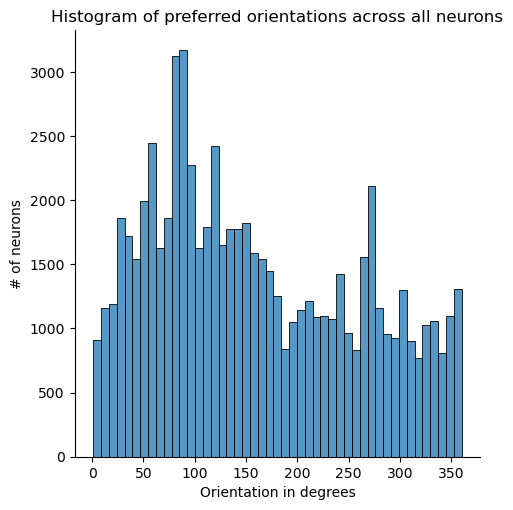

In [23]:
sns.displot(admissible_neurons, x="Pref_Orientation_spikes_2")
plt.title('Histogram of preferred orientations across all neurons')
plt.ylabel('# of neurons')
plt.xlabel('Orientation in degrees')
plt.show()